<a href="https://colab.research.google.com/github/rpasquini/econometria-iae/blob/main/CEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print('hola')

hola


# Introducción
En este notebook introduciremos algunas de las principales librerías con las que vamos a estar trabajando.

## Donde estamos
Nuestro ambiente de trabajo ahora es un notebook que permite correr codigo, procesar datos, imprimir gráficos, etc. Estos notebooks en general se conocen como "Jupyter notebooks" y tienen como particularidad que el entorno visual en el que trabajan vive en el navegador. En este momento además, el notebook con el que trabajan "vive en la nube" de Google Colaboratory. Utiliza recursos de la nube de Google para procesar los datos, etc. Para trabajar con nuestros propios datos tendremos que hacerlos accesibles a Google Colab (subiendo los datos al Colab o subiendo los datos a otro servidor al cual las librerias que usemos puedan acceder)

Comentarios relacionados:

* Como dijimos el notebook es solo un entorno visual. En este notebook vamos a trabajar con librerias de análisis cuantitativo construidas sobre el lenguaje Python. Los notebooks de Colab tambien pueden correr código de R.

* Trabajar en la nube "Colab" es conveniente para una clase. También es posible (y a veces necesario) trabajar con un Jupyter Notebook instalado "localmente" en sus computadoras.

* El ambiente virtual provisto por Google Colab va a borrar todo el contenido que se aloje en la memoria virtual después de un rato de inactividad. Lo unico que se mantiene es lo que está escrito en el notebook (el codigo y el texto explicativo). Esto implica que el notebook debe contener todo el codigo desde la carga de los datos hasta su resultado final para que pueda ser reproducido en cualquier momento.

# Librerías con las que vamos a trabajar

Vamos a arrancar con estas:

- Pandas: Una de las principales librerías para trabajar y manipular datos en Python en forma tabular (llamados **dataframes** y usualmente abreviados **df**)
- Geopandas: Una libreria que busca ser similar a Pandas pero adaptada adicionalmente a  datos con una dimensión geográfica. A los objetos de geopandas los llamamos **geodataframes**.
- StatsModels: Una librería para procesamientos estadísticos.

Al respecto del uso de librerías, además debemos tener en cuenta:

- En general para usar las librerías tienen que estar *instaladas* y además *importadas * al ambiente de trabajo en el que estemos.
- Los Notebooks de Colab vienen con algunas librerías preinstaladas. Solo será necesario importarlas. Para las que no, será necesario instalarlas ( usando un comando de instalacion llamado *pip*).

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [6]:
df

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_a,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,0,16
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,0,16
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,0,16
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,0,357
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,5373,1,1,8,4,95,2,1,4,0,...,0,0,0,0,0,0,0,0,0,40
12497,5374,1,1,7,4,98,2,1,4,0,...,0,0,0,0,0,0,0,0,0,205
12498,5374,1,2,7,4,76,2,7,3,0,...,0,0,0,0,0,0,0,0,0,205
12499,5375,1,1,15,4,100,2,1,4,0,...,0,0,0,0,0,0,0,0,0,165


<Axes: >

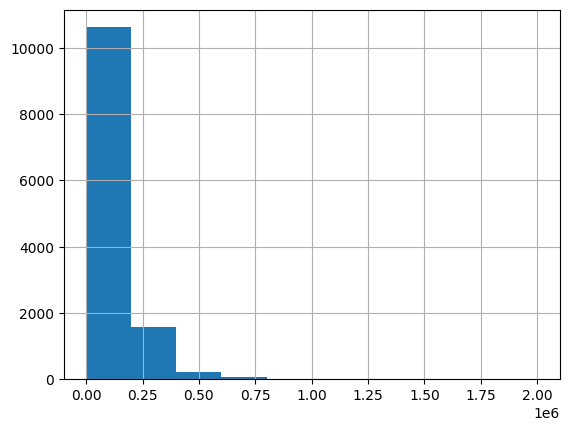

In [7]:
df['ingtot_2'].hist()

In [8]:
import numpy as np

In [9]:
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

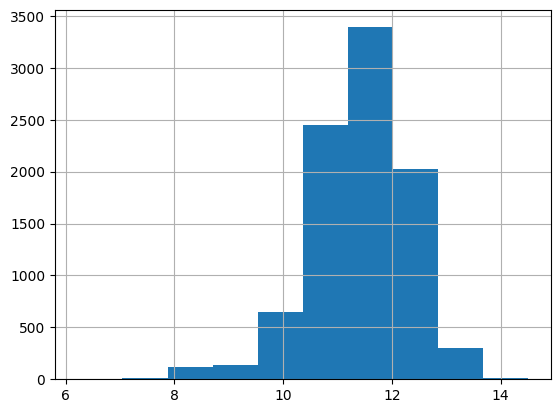

In [10]:
df['logingreso'].hist()

In [11]:
# dataframe
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp,logingreso
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,16,10.064756
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,16,8.987197
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,16,11.407565
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,357,10.596635
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,106,9.903488


In [12]:
df.shape

(12501, 141)

In [13]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a',
       ...
       't50d_b', 't50d_c', 't50d_d', 't50d_e', 't50d_f', 't51_d', 't23_1_cod',
       't24_1_cod', 'fexp', 'logingreso'],
      dtype='object', length=141)

In [14]:
df.logingreso

,logingreso
0,10.064756
1,8.987197
2,11.407565
3,10.596635
4,9.903488
...,...
12496,11.362103
12497,11.302204
12498,10.703244
12499,11.608236


In [15]:
df['logingreso']

,logingreso
0,10.064756
1,8.987197
2,11.407565
3,10.596635
4,9.903488
...,...
12496,11.362103
12497,11.302204
12498,10.703244
12499,11.608236


<Axes: >

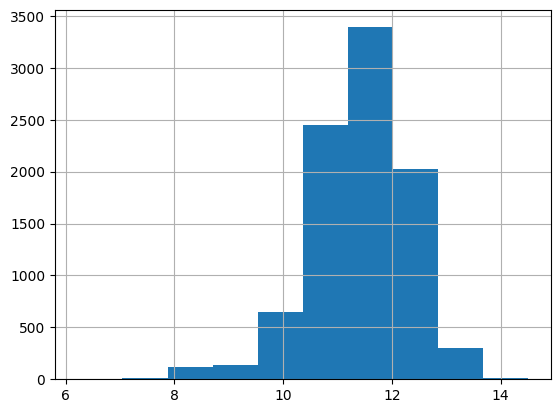

In [16]:
df.logingreso.hist()

<Axes: >

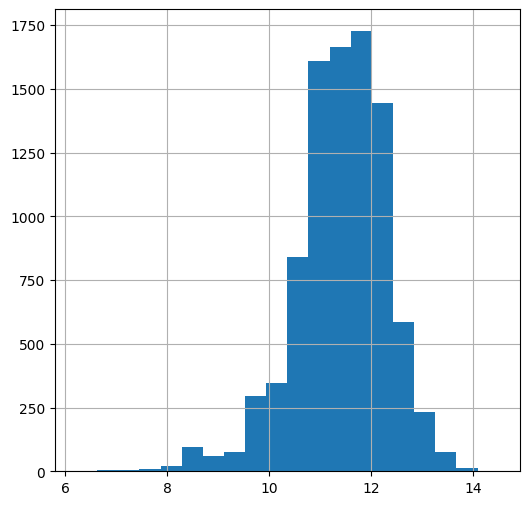

In [17]:
# pueden agrandar el grafico usando lo siguiente:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
df.logingreso.hist(bins=20)

<Axes: >

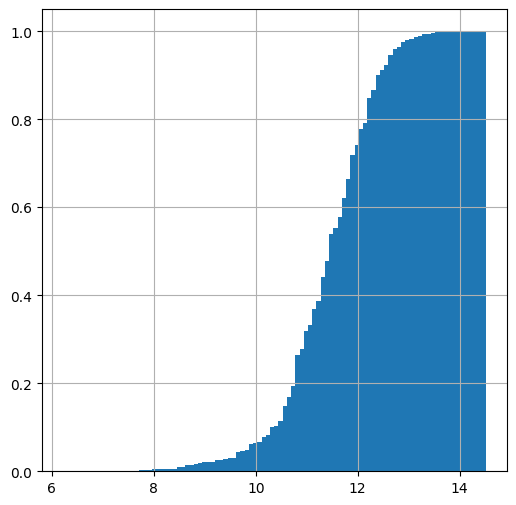

In [18]:
df.logingreso.hist(cumulative=True, density=1, bins=100)

In [19]:
df.logingreso.mean()

np.float64(11.421992481703352)

In [20]:
df.sexo.unique()

array([2, 1])

# "Filtrando" el Dataframe
Seleccionamos las filas del dataframe en base a una condicion logica usando el método .loc \\
Dentro del .loc tenemos que especificar una condición lógica


Aqui van algunos ejemplos mas sobre como filtrar el dataframe

In [21]:
# Ejemplo: promedio de logingreso de personas mayores a 40 años

df.loc[df.edad>=40].logingreso.mean()

np.float64(11.48724998542686)

In [34]:
# Ejemplo: promedio de logingreso de varones y mayores a 40 años

df.loc[(df.sexo==1) & (df.edad>=40)].logingreso.mean()

np.float64(11.605273715902845)

In [35]:
# Ejemplo: promedio de logingreso de mujeres o mayores a 40 años
df.loc[(df.sexo==2) | (df.edad>=40) ].logingreso.mean()

np.float64(11.427370597085128)

## Filtrando el dataframe


Para escribir una condicion recuerden que pueden utilizar los siguientes lógicos:

==    para chequear la  condicion "equivale a" o "igual a" va doble igual

!= distinto a

\> mayor a \\

\> = mayor o igual a

< menor a

<= menor o igual a

En el caso de querer usar dos condiciones o más:

(esta condicion) & (esta condicion) Se cumple esta condicion Y esta otra

(esta condicion) | (esta condicion) Se cumple esta condicion O esta otra

Recuerden que las condiciones tiene que ir en parentesis!





# Aplicando el CEF

Vamos a explorar ahore el ingreso esperado de varones y mujeres. Usando el modelo CEF tendríamos:

$$E[y|sexo=\text{varon}]$$

y

$$E[y|sexo=\text{mujer}]$$


In [37]:
df.loc[df.sexo==1].logingreso.mean()

np.float64(11.52294489501585)

In [36]:
df.loc[df.sexo==2].logingreso.mean()

np.float64(11.333581128388266)

# Un metodo alternativo para contruir medias por grupos usando groupby

In [38]:
df.groupby(by='sexo').mean()

,id,nhogar,miembro,comuna,dominio,edad,parentes_2,p5_2,p6_a,p6_b,...,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp,logingreso,dmujer
sexo,,,,,,,,,,,,,,,,,,,,,
1,2471.381915,1.005480,2.076897,7.392190,3.869669,38.533653,2.146258,2.843295,11.968830,4.820517,...,0.033396,0.034252,0.033739,0.042644,0.044357,148.886111,1430.924302,248.361021,11.522945,NaN
2,2624.456169,1.007805,2.050135,7.382318,3.872561,41.841639,2.180426,2.946563,10.603873,4.207445,...,0.042330,0.043080,0.041729,0.049234,0.055389,210.320775,1369.178325,244.875113,11.333581,NaN


In [27]:
df.groupby(by='sexo')['logingreso'].mean()

,logingreso
sexo,
1,11.522945
2,11.333581


# Ejemplo más avanzado: creando una tabla de promedios y luego grafico las funciones CEF segun sexo y escolaridad

In [28]:
df_means=df.groupby(['sexo','aesc'],as_index=False)['logingreso'].mean()
df_means=df_means.loc[df_means.aesc<20]
#.plot(x='aesc',y='logingreso')

<Axes: xlabel='aesc'>

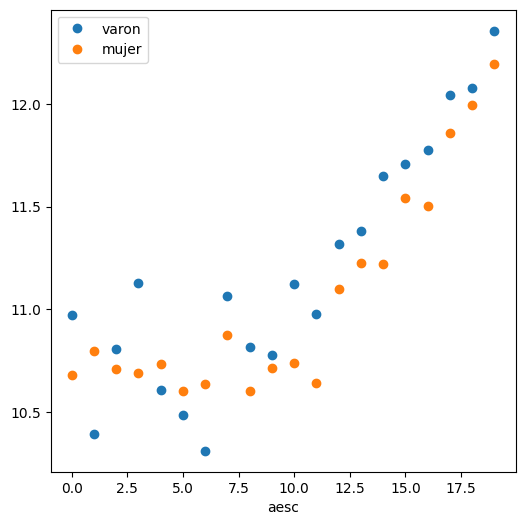

In [39]:
import matplotlib.pyplot as plt
base=df_means.loc[df_means.sexo==1].plot(x='aesc',y='logingreso', style='o', label='varon')
df_means.loc[df_means.sexo==2].plot(x='aesc',y='logingreso', style='o', ax=base, label='mujer')

Creando una variable dummy

In [40]:
df.loc[df['sexo'] == 1, 'dmujer'] = 0
df.loc[df['sexo'] == 2, 'dmujer'] = 1

## OLS

Statsmodels es la librería de operaciones estadísticas que usaremos para estimar OLS
Vamos a utilizar los metodos de statsmodels.formula ya que luego van a simplificar la especificación de los modelos

In [41]:
import statsmodels.formula.api as smf

Estimar la regresion va a requerir 3 pasos

1. Definir el modelo
2. Ajustar el modelo
3. Imprimir los resultados

Warning: Por default statsmodels.formula va a dropear observaciones que tengan un missing value en alguna de las variables.


In [45]:
modelo=smf.ols(formula='logingreso ~ dmujer', data=df)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.39e-23
Time:                        11:55:00   Log-Likelihood:                -11940.
No. Observations:                9105   AIC:                         2.388e+04
Df Residuals:                    9103   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5229      0.014    836.499      0.0